# Estimating population by single years of age for different polygons - An example with Sierra Leone

### Note: All Python codes included here needs to be executed within the Python console of QGIS 3.X

## Context

Sierra Leone, like most developing countries, needs to navigate a data environment that is far from optimal, as severe limitations in the amount and accuracy of data jinder the types of analysis and of policy recommendations that can be given, as well as the follow-up to said policies. Within the education sector, this means having appropriate information from the Education Monitoring and Information System (EMIS), as well as from other sources, such as population estimates. These last estimates are fundamental for a variaty of indicators, such as Gross and Net Enrolment Rates, Gender Parity Indeces, Partcipation Rates, Out-of-school Children estimations, and so on. It is thus imperative to establish a methodology that allows policy makers to obtain accurate population numbers at different administrative levels, as well as in other constructs such as catchment areas and school isochrones. 

While there are currently projections being estimated by organizations such as WorldPop (https://www.worldpop.org/), and going down to gridded rasters of 30m x 30m, population estimates are still being presented in 5-year age groups, which rarely coincide with the estipulated years of the education system in countries around the world. Since many of the indicators previously mentioned require the calculation of populations according to their appropriate schooling level, it is thus necessary to determine a way to obtain accurate, georeferenced methodologies to get the number of girls and boys of each age anywhere in a country. 

## Data source

For the present estimation the information will be obtained from two different sources:

The first is the WorldPop webpage, particularly from the _Age and Sex Structure_ section for Sierra Leone in 2019 (https://www.worldpop.org/geodata/summary?id=16654). The following files were downloaded and stored as-is:

- sle_f_0_2019.tif (Information from 0 to 1 years of age for women)
- sle_f_1_2019.tif (Information from 1 to 4 years of age for women)
- sle_f_5_2019.tif (Information from 5 to 9 years of age for women)
- sle_f_10_2019.tif (Information from 10 to 14 years of age for women)
- sle_f_15_2019.tif (Information from 15 to 19 years of age for women)
- sle_f_20_2019.tif (Information from 20 to 14 years of age for women)
- sle_f_25_2019.tif (Information from 25 to 19 years of age for women)
- sle_m_0_2019.tif (Information from 0 to 1 years of age for men)
- sle_m_1_2019.tif (Information from 1 to 4 years of age for men)
- sle_m_5_2019.tif (Information from 5 to 9 years of age for men)
- sle_m_10_2019.tif (Information from 10 to 14 years of age for men)
- sle_m_15_2019.tif (Information from 15 to 19 years of age for men)
- sle_m_20_2019.tif (Information from 20 to 14 years of age for men)
- sle_m_25_2019.tif (Information from 25 to 19 years of age for men)

The second is the Humanitarian Data Exchange webpage, particularly the administrative boundaries for Sierra Leone (https://data.humdata.org/dataset/sierra-leone-all-ad-min-level-boundaries). Particularly, the following files are needed:

- sle_admbnda_adm1_1m_gov_ocha_20161017.shp.zip (Admin 1: Provinces The geodata represents the provinces of Sierra Leone.)
- sle_admbnda_adm2_1m_gov_ocha.zip (Admin 2 boundaries : districts)
- sle_admbnda_adm3_1m_gov_ocha_20161017.zip (Admin 3 boundaries : Chiefdoms)
- Admin 4 Counties (Admin 4 boundaries: Counties)


## Data processing

### Framework

The processing of the population information will be done following the diagram below:


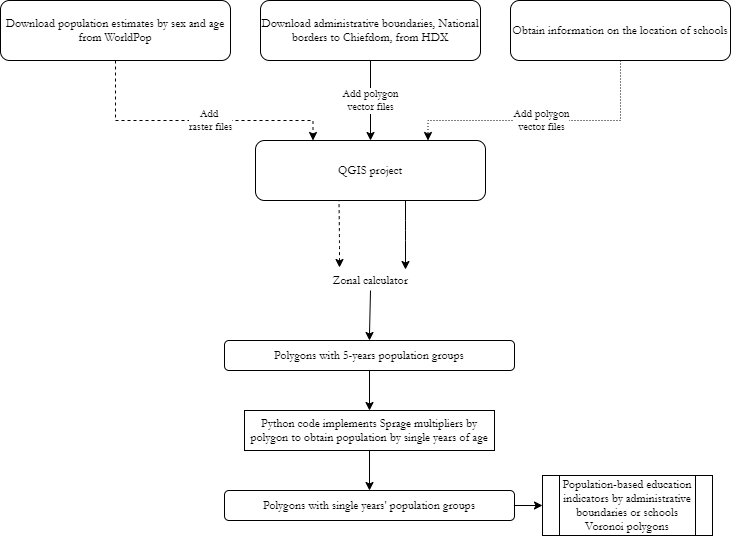

In [1]:
from IPython.display import Image
Image("Framework.png")

First, we load all the necessary libraries, and import all the layers. 

In [ ]:
from PyQt5.QtGui import *
from qgis.core import *
import numpy as np
import pandas as pd
from shapely.geometry import Point
import processing, os

# We add all the administrative layers

os.chdir("C:\\Users\g.vargas\BOX\IIEP_MyProjects\MP_01000298\WF_SchoolMappingTool\Data\Sierra Leone") ## Replace this be your own folder

Level0 = "Shapefiles\ssd_admbnda_adm0_imwg_nbs_20180817.shp"
Level1 = "Shapefiles\ssd_admbnda_adm1_imwg_nbs_20180817.shp"
Level2 = "Shapefiles\ssd_admbnda_adm2_imwg_nbs_20180817.shp"
Level3 = "Shapefiles\south_sudan_admin4_poly.shp"

AdministrativeBoundaries_Level0 = iface.addVectorLayer(Level0, "Administrative boundaries - Level 0", "ogr")
AdministrativeBoundaries_Level1 = iface.addVectorLayer(Level1, "Administrative boundaries - Level 1", "ogr")
AdministrativeBoundaries_Level2 = iface.addVectorLayer(Level2, "Administrative boundaries - Level 2", "ogr")
AdministrativeBoundaries_Level3 = iface.addVectorLayer(Level3, "Administrative boundaries - Level 3", "ogr")

# We add all the raster layers with the population estimates

sle_f_0_2019 = iface.addRasterLayer("Databases\sle_f_0_2019.tif", "sle_f_0_2019", "gdal")
sle_f_1_2019.tif = iface.addRasterLayer("Databases\sle_f_1_2019.tif", "sle_f_1_2019", "gdal")
sle_f_5_2019.tif = iface.addRasterLayer("Databases\sle_f_5_2019.tif", "sle_f_5_2019", "gdal")
sle_f_10_2019.tif = iface.addRasterLayer("Databases\sle_f_10_2019.tif", "sle_f_10_2019", "gdal")
sle_f_15_2019.tif = iface.addRasterLayer("Databases\sle_f_15_2019.tif", "sle_f_15_2019", "gdal")
sle_f_20_2019.tif = iface.addRasterLayer("Databases\sle_f_20_2019.tif", "sle_f_20_2019", "gdal")
sle_f_25_2019.tif = iface.addRasterLayer("Databases\sle_f_25_2019.tif", "sle_f_25_2019", "gdal")
sle_m_0_2019.tif = iface.addRasterLayer("Databases\sle_m_0_2019.tif", "sle_m_0_2019", "gdal")
sle_m_1_2019.tif = iface.addRasterLayer("Databases\sle_m_1_2019.tif", "sle_m_1_2019", "gdal")
sle_m_5_2019.tif = iface.addRasterLayer("Databases\sle_m_5_2019.tif", "sle_m_5_2019", "gdal")
sle_m_10_2019.tif = iface.addRasterLayer("Databases\sle_m_10_2019.tif", "sle_m_10_2019", "gdal")
sle_m_15_2019.tif = iface.addRasterLayer("Databases\sle_m_15_2019.tif", "sle_m_15_2019", "gdal")
sle_m_20_2019.tif = iface.addRasterLayer("Databases\sle_m_20_2019.tif", "sle_m_20_2019", "gdal")
sle_m_25_2019.tif = iface.addRasterLayer("Databases\sle_m_25_2019.tif", "sle_m_25_2019", "gdal")

A code was created using the Processing Modeler in QGIS to obtain the desired result. The structure of the code is shown below:

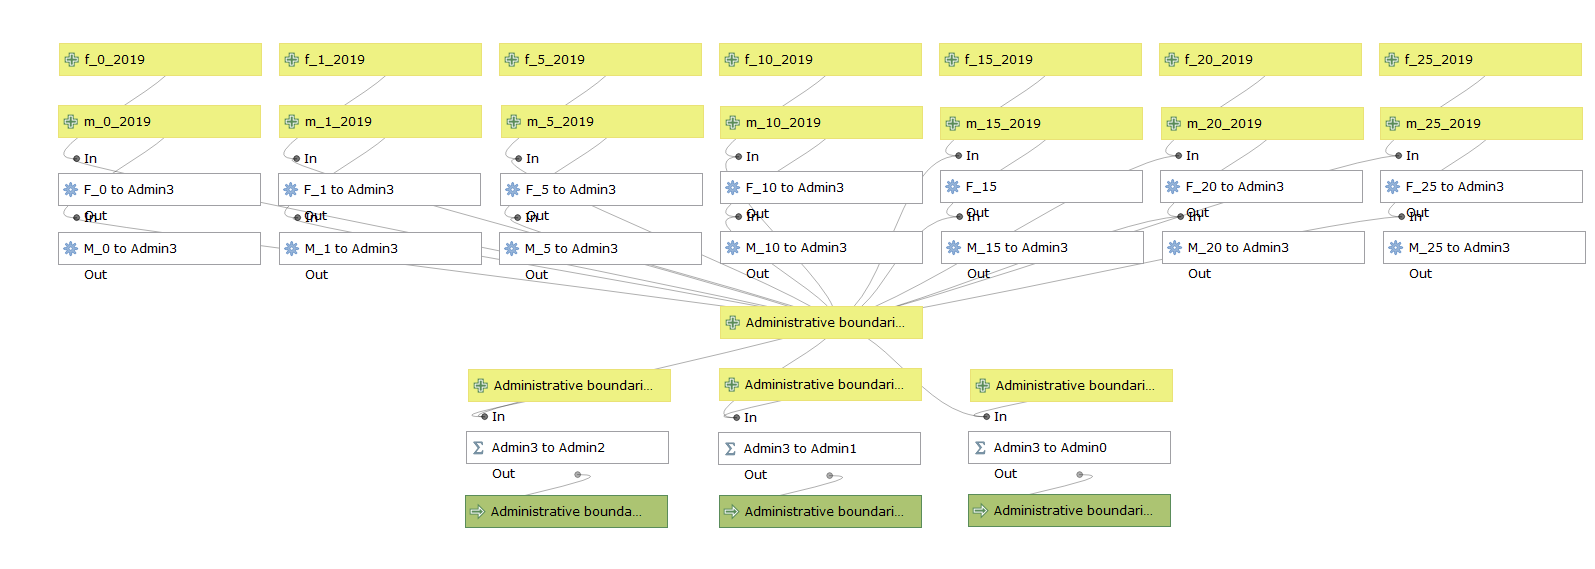

In [2]:
from IPython.display import Image
Image("Importing_projecting_population_data.png")

The resulting code from said structure is shown below. The Model can be also downloaded from the following link: https://box.iiep.unesco.org/index.php/s/XqjkNFFTHpzxWt7

Note that once this model is run, the result will be that all administrative boundaries, regardless of the level, will have the population estimates for 5-year groups. 

In [ ]:
from qgis.core import QgsProcessing
from qgis.core import QgsProcessingAlgorithm
from qgis.core import QgsProcessingMultiStepFeedback
from qgis.core import QgsProcessingParameterVectorLayer
from qgis.core import QgsProcessingParameterRasterLayer
from qgis.core import QgsProcessingParameterFeatureSink
import processing


class Importing_projecting_population_data(QgsProcessingAlgorithm):

    def initAlgorithm(self, config=None):
        self.addParameter(QgsProcessingParameterVectorLayer('administrativeboundarieslevel0', 'Administrative boundaries - Level 0', types=[QgsProcessing.TypeVectorPolygon], defaultValue=None))
        self.addParameter(QgsProcessingParameterVectorLayer('administrativeboundarieslevel1', 'Administrative boundaries - Level 1', types=[QgsProcessing.TypeVectorPolygon], defaultValue=None))
        self.addParameter(QgsProcessingParameterVectorLayer('administrativeboundarieslevel2', 'Administrative boundaries - Level 2', types=[QgsProcessing.TypeVectorPolygon], defaultValue=None))
        self.addParameter(QgsProcessingParameterVectorLayer('administrativeboundarieslevel3', 'Administrative boundaries - Level 3', types=[QgsProcessing.TypeVectorPolygon], defaultValue=None))
        self.addParameter(QgsProcessingParameterRasterLayer('slef02019', 'f_0_2019', defaultValue=None))
        self.addParameter(QgsProcessingParameterRasterLayer('slef102019', 'f_10_2019', defaultValue=None))
        self.addParameter(QgsProcessingParameterRasterLayer('slef12019', 'f_1_2019', defaultValue=None))
        self.addParameter(QgsProcessingParameterRasterLayer('slef152019', 'f_15_2019', defaultValue=None))
        self.addParameter(QgsProcessingParameterRasterLayer('slef202019', 'f_20_2019', defaultValue=None))
        self.addParameter(QgsProcessingParameterRasterLayer('slef252019', 'f_25_2019', defaultValue=None))
        self.addParameter(QgsProcessingParameterRasterLayer('slef52019', 'f_5_2019', defaultValue=None))
        self.addParameter(QgsProcessingParameterRasterLayer('slem02019', 'm_0_2019', defaultValue=None))
        self.addParameter(QgsProcessingParameterRasterLayer('slem102019', 'm_10_2019', defaultValue=None))
        self.addParameter(QgsProcessingParameterRasterLayer('slem12019', 'm_1_2019', defaultValue=None))
        self.addParameter(QgsProcessingParameterRasterLayer('slem152019', 'm_15_2019', defaultValue=None))
        self.addParameter(QgsProcessingParameterRasterLayer('slem202019', 'm_20_2019', defaultValue=None))
        self.addParameter(QgsProcessingParameterRasterLayer('slem252019', 'm_25_2019', defaultValue=None))
        self.addParameter(QgsProcessingParameterRasterLayer('slem52019', 'm_5_2019', defaultValue=None))
        self.addParameter(QgsProcessingParameterFeatureSink('AdministrativeBoundariesLevel2Population', 'Administrative boundaries - Level 2 - Population', type=QgsProcessing.TypeVectorAnyGeometry, createByDefault=True, defaultValue='ogr:dbname=\'C:/Users/g.vargas/BOX/IIEP_MyProjects/MP_01000298/WF_SchoolMappingTool/Data/Sierra Leone/Sierra Leone.gpkg\' table=\"Administrative boundaries - Level 1 - Population\" (geom) sql='))
        self.addParameter(QgsProcessingParameterFeatureSink('AdministrativeBoundariesLevel1', 'Administrative boundaries - Level 1', type=QgsProcessing.TypeVectorAnyGeometry, createByDefault=True, defaultValue='ogr:dbname=\'C:/Users/g.vargas/BOX/IIEP_MyProjects/MP_01000298/WF_SchoolMappingTool/Data/Sierra Leone/Sierra Leone.gpkg\' table=\"Administrative boundaries - Level 1 - Population\" (geom) sql='))
        self.addParameter(QgsProcessingParameterFeatureSink('AdministrativeBoundariesLevel0', 'Administrative boundaries - Level 0', type=QgsProcessing.TypeVectorAnyGeometry, createByDefault=True, defaultValue='ogr:dbname=\'C:/Users/g.vargas/BOX/IIEP_MyProjects/MP_01000298/WF_SchoolMappingTool/Data/Sierra Leone/Sierra Leone.gpkg\' table=\"Administrative boundaries - Level 0 - Population\" (geom) sql='))

    def processAlgorithm(self, parameters, context, model_feedback):
        # Use a multi-step feedback, so that individual child algorithm progress reports are adjusted for the
        # overall progress through the model
        feedback = QgsProcessingMultiStepFeedback(17, model_feedback)
        results = {}
        outputs = {}

        # M_15 to Admin3
        alg_params = {
            'COLUMN_PREFIX': 'M_15',
            'INPUT_RASTER': parameters['slem152019'],
            'INPUT_VECTOR': parameters['administrativeboundarieslevel3'],
            'RASTER_BAND': 1,
            'STATS': [1]
        }
        outputs['M_15ToAdmin3'] = processing.run('qgis:zonalstatistics', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(1)
        if feedback.isCanceled():
            return {}

        # Admin3 to Admin1
        alg_params = {
            'DISCARD_NONMATCHING': True,
            'INPUT': parameters['administrativeboundarieslevel1'],
            'JOIN': parameters['administrativeboundarieslevel3'],
            'JOIN_FIELDS': 'F_0 F_1 F_5 F_10 F_15 F_20 F_25 M_0 M_1 M_5 M_10 M_15 M_20 M_25',
            'PREDICATE': [0,1,2,4,5,6],
            'SUMMARIES': [5],
            'OUTPUT': parameters['AdministrativeBoundariesLevel1']
        }
        outputs['Admin3ToAdmin1'] = processing.run('qgis:joinbylocationsummary', alg_params, context=context, feedback=feedback, is_child_algorithm=True)
        results['AdministrativeBoundariesLevel1'] = outputs['Admin3ToAdmin1']['OUTPUT']

        feedback.setCurrentStep(2)
        if feedback.isCanceled():
            return {}

        # F_0 to Admin3
        alg_params = {
            'COLUMN_PREFIX': 'F_0',
            'INPUT_RASTER': parameters['slef02019'],
            'INPUT_VECTOR': parameters['administrativeboundarieslevel3'],
            'RASTER_BAND': 1,
            'STATS': [1]
        }
        outputs['F_0ToAdmin3'] = processing.run('qgis:zonalstatistics', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(3)
        if feedback.isCanceled():
            return {}

        # F_20 to Admin3
        alg_params = {
            'COLUMN_PREFIX': 'F_20',
            'INPUT_RASTER': parameters['slef202019'],
            'INPUT_VECTOR': parameters['administrativeboundarieslevel3'],
            'RASTER_BAND': 1,
            'STATS': [1]
        }
        outputs['F_20ToAdmin3'] = processing.run('qgis:zonalstatistics', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(4)
        if feedback.isCanceled():
            return {}

        # Admin3 to Admin2
        alg_params = {
            'DISCARD_NONMATCHING': True,
            'INPUT': parameters['administrativeboundarieslevel2'],
            'JOIN': parameters['administrativeboundarieslevel3'],
            'JOIN_FIELDS': 'F_0 F_1 F_5 F_10 F_15 F_20 F_25 M_0 M_1 M_5 M_10 M_15 M_20 M_25',
            'PREDICATE': [0,1,2,4,5,6],
            'SUMMARIES': [5],
            'OUTPUT': parameters['AdministrativeBoundariesLevel2Population']
        }
        outputs['Admin3ToAdmin2'] = processing.run('qgis:joinbylocationsummary', alg_params, context=context, feedback=feedback, is_child_algorithm=True)
        results['AdministrativeBoundariesLevel2Population'] = outputs['Admin3ToAdmin2']['OUTPUT']

        feedback.setCurrentStep(5)
        if feedback.isCanceled():
            return {}

        # F_15
        alg_params = {
            'COLUMN_PREFIX': 'F_15',
            'INPUT_RASTER': parameters['slef152019'],
            'INPUT_VECTOR': parameters['administrativeboundarieslevel3'],
            'RASTER_BAND': 1,
            'STATS': [1]
        }
        outputs['F_15'] = processing.run('qgis:zonalstatistics', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(6)
        if feedback.isCanceled():
            return {}

        # F_1 to Admin3
        alg_params = {
            'COLUMN_PREFIX': 'F_1',
            'INPUT_RASTER': parameters['slef12019'],
            'INPUT_VECTOR': parameters['administrativeboundarieslevel3'],
            'RASTER_BAND': 1,
            'STATS': [1]
        }
        outputs['F_1ToAdmin3'] = processing.run('qgis:zonalstatistics', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(7)
        if feedback.isCanceled():
            return {}

        # M_0 to Admin3
        alg_params = {
            'COLUMN_PREFIX': 'M_0',
            'INPUT_RASTER': parameters['slem02019'],
            'INPUT_VECTOR': parameters['administrativeboundarieslevel3'],
            'RASTER_BAND': 1,
            'STATS': [1]
        }
        outputs['M_0ToAdmin3'] = processing.run('qgis:zonalstatistics', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(8)
        if feedback.isCanceled():
            return {}

        # M_5 to Admin3
        alg_params = {
            'COLUMN_PREFIX': 'M_5',
            'INPUT_RASTER': parameters['slem52019'],
            'INPUT_VECTOR': parameters['administrativeboundarieslevel3'],
            'RASTER_BAND': 1,
            'STATS': [1]
        }
        outputs['M_5ToAdmin3'] = processing.run('qgis:zonalstatistics', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(9)
        if feedback.isCanceled():
            return {}

        # M_1 to Admin3
        alg_params = {
            'COLUMN_PREFIX': 'M_1',
            'INPUT_RASTER': parameters['slem12019'],
            'INPUT_VECTOR': parameters['administrativeboundarieslevel3'],
            'RASTER_BAND': 1,
            'STATS': [1]
        }
        outputs['M_1ToAdmin3'] = processing.run('qgis:zonalstatistics', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(10)
        if feedback.isCanceled():
            return {}

        # M_10 to Admin3
        alg_params = {
            'COLUMN_PREFIX': 'M_10',
            'INPUT_RASTER': parameters['slem102019'],
            'INPUT_VECTOR': parameters['administrativeboundarieslevel3'],
            'RASTER_BAND': 1,
            'STATS': [1]
        }
        outputs['M_10ToAdmin3'] = processing.run('qgis:zonalstatistics', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(11)
        if feedback.isCanceled():
            return {}

        # M_20 to Admin3
        alg_params = {
            'COLUMN_PREFIX': 'M_20',
            'INPUT_RASTER': parameters['slem202019'],
            'INPUT_VECTOR': parameters['administrativeboundarieslevel3'],
            'RASTER_BAND': 1,
            'STATS': [1]
        }
        outputs['M_20ToAdmin3'] = processing.run('qgis:zonalstatistics', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(12)
        if feedback.isCanceled():
            return {}

        # F_25 to Admin3
        alg_params = {
            'COLUMN_PREFIX': 'F_25',
            'INPUT_RASTER': parameters['slef252019'],
            'INPUT_VECTOR': parameters['administrativeboundarieslevel3'],
            'RASTER_BAND': 1,
            'STATS': [1]
        }
        outputs['F_25ToAdmin3'] = processing.run('qgis:zonalstatistics', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(13)
        if feedback.isCanceled():
            return {}

        # M_25 to Admin3
        alg_params = {
            'COLUMN_PREFIX': 'M_25',
            'INPUT_RASTER': parameters['slem252019'],
            'INPUT_VECTOR': parameters['administrativeboundarieslevel3'],
            'RASTER_BAND': 1,
            'STATS': [1]
        }
        outputs['M_25ToAdmin3'] = processing.run('qgis:zonalstatistics', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(14)
        if feedback.isCanceled():
            return {}

        # Admin3 to Admin0
        alg_params = {
            'DISCARD_NONMATCHING': True,
            'INPUT': parameters['administrativeboundarieslevel0'],
            'JOIN': parameters['administrativeboundarieslevel3'],
            'JOIN_FIELDS': 'F_0 F_1 F_5 F_10 F_15 F_20 F_25 M_0 M_1 M_5 M_10 M_15 M_20 M_25',
            'PREDICATE': [0,1,2,4,5,6],
            'SUMMARIES': [5],
            'OUTPUT': parameters['AdministrativeBoundariesLevel0']
        }
        outputs['Admin3ToAdmin0'] = processing.run('qgis:joinbylocationsummary', alg_params, context=context, feedback=feedback, is_child_algorithm=True)
        results['AdministrativeBoundariesLevel0'] = outputs['Admin3ToAdmin0']['OUTPUT']

        feedback.setCurrentStep(15)
        if feedback.isCanceled():
            return {}

        # F_5 to Admin3
        alg_params = {
            'COLUMN_PREFIX': 'F_5',
            'INPUT_RASTER': parameters['slef52019'],
            'INPUT_VECTOR': parameters['administrativeboundarieslevel3'],
            'RASTER_BAND': 1,
            'STATS': [1]
        }
        outputs['F_5ToAdmin3'] = processing.run('qgis:zonalstatistics', alg_params, context=context, feedback=feedback, is_child_algorithm=True)

        feedback.setCurrentStep(16)
        if feedback.isCanceled():
            return {}

        # F_10 to Admin3
        alg_params = {
            'COLUMN_PREFIX': 'F_10',
            'INPUT_RASTER': parameters['slef102019'],
            'INPUT_VECTOR': parameters['administrativeboundarieslevel3'],
            'RASTER_BAND': 1,
            'STATS': [1]
        }
        outputs['F_10ToAdmin3'] = processing.run('qgis:zonalstatistics', alg_params, context=context, feedback=feedback, is_child_algorithm=True)
        return results

    def name(self):
        return 'Importing_projecting_population_data'

    def displayName(self):
        return 'Importing_projecting_population_data'

    def group(self):
        return 'Population_estimates'

    def groupId(self):
        return 'Population_estimates'

    def createInstance(self):
        return Importing_projecting_population_data()


Once we have the Administrative boundaries' polygon shapefiles with the 5-year age groups we can proceed to the application of the Sprague multipliers to obtain, for each subdivision, the single-years-of-age population estimate from ages 0 to 19. To continue, create an export formatted as a Comma Separated Values' (CSV) file, called "Population estimates - 5-year age groups.csv"

In [ ]:
## Loading the necessary libraries

import pandas as pd
import numpy as np

## Loading the data we obtained from the QGIS routine

data = pd.read_csv("Databases\Population estimates - 5-year age groups.csv")
PopulationEstimates = pd.DataFrame(data, columns = ['admin3Name', 'admin2Name', 'admin1Name', 'M_0sum', 'M_1sum', 'M_5sum', 'M_20sum', 'M_15sum', 'M_15sum', 'M_5sum', 'M_10sum', 'M_0sum', 'M_20sum', 'M_1sum', 'M_10sum', 'M_25sum', 'M_25sum'])

## We first create the variable for the groups 0 to 4 years

PopulationEstimates['M_0sum'] = PopulationEstimates['M_0sum'] + PopulationEstimates['M_1sum']
PopulationEstimates['M_0sum'] = PopulationEstimates['M_0sum'] + PopulationEstimates['M_1sum']

## We proceed to create the groups using the Sprague multipliers

# Female

PopulationEstimates['Y_M_0'] = 0.3616*PopulationEstimates['M_0sum'] - 0.2768*PopulationEstimates['M_5sum'] + 0.1488*PopulationEstimates['M_10sum'] - 0.0336*PopulationEstimates['M_15sum'] 
PopulationEstimates['Y_M_1'] = 0.2640*PopulationEstimates['M_0sum'] - 0.0960*PopulationEstimates['M_5sum'] + 0.0400*PopulationEstimates['M_10sum'] - 0.0080*PopulationEstimates['M_15sum'] 
PopulationEstimates['Y_M_2'] = 0.1840*PopulationEstimates['M_0sum'] + 0.0400*PopulationEstimates['M_5sum'] - 0.0320*PopulationEstimates['M_10sum'] + 0.0080*PopulationEstimates['M_15sum'] 
PopulationEstimates['Y_M_3'] = 0.1200*PopulationEstimates['M_0sum'] + 0.1360*PopulationEstimates['M_5sum'] - 0.0720*PopulationEstimates['M_10sum'] + 0.0160*PopulationEstimates['M_15sum'] 
PopulationEstimates['Y_M_4'] = PopulationEstimates['M_0sum'] - PopulationEstimates['Y_M_0'] - PopulationEstimates['Y_M_1'] - PopulationEstimates['Y_M_2'] - PopulationEstimates['Y_M_3']
PopulationEstimates['Y_M_5'] = 0.0336*PopulationEstimates['M_0sum'] + 0.2272*PopulationEstimates['M_5sum'] - 0.0752*PopulationEstimates['M_10sum'] + 0.0144*PopulationEstimates['M_15sum'] 
PopulationEstimates['Y_M_6'] = 0.0080*PopulationEstimates['M_0sum'] + 0.2320*PopulationEstimates['M_5sum'] - 0.0480*PopulationEstimates['M_10sum'] + 0.0080*PopulationEstimates['M_15sum'] 
PopulationEstimates['Y_M_7'] = -0.0080*PopulationEstimates['M_0sum'] + 0.2160*PopulationEstimates['M_5sum'] - 0.0080*PopulationEstimates['M_10sum'] + 0.0000*PopulationEstimates['M_15sum']
PopulationEstimates['Y_M_8'] = -0.0160*PopulationEstimates['M_0sum'] + 0.1840*PopulationEstimates['M_5sum'] + 0.0400*PopulationEstimates['M_10sum'] - 0.0080*PopulationEstimates['M_15sum']
PopulationEstimates['Y_M_9'] = PopulationEstimates['M_5sum'] - PopulationEstimates['Y_M_5'] - PopulationEstimates['Y_M_6'] - PopulationEstimates['Y_M_7'] - PopulationEstimates['Y_M_8']
PopulationEstimates['Y_M_10'] = -0.0128*PopulationEstimates['M_0sum'] + 0.0848*PopulationEstimates['M_5sum'] + 0.1504*PopulationEstimates['M_10sum'] - 0.0240*PopulationEstimates['M_15sum'] + 0.0016*PopulationEstimates['M_20sum']
PopulationEstimates['Y_M_11'] = -0.0016*PopulationEstimates['M_0sum'] + 0.0144*PopulationEstimates['M_5sum'] + 0.2224*PopulationEstimates['M_10sum'] - 0.0416*PopulationEstimates['M_15sum'] + 0.0064*PopulationEstimates['M_20sum']
PopulationEstimates['Y_M_12'] = 0.0064*PopulationEstimates['M_0sum'] - 0.0336*PopulationEstimates['M_5sum'] + 0.2544*PopulationEstimates['M_10sum'] - 0.0336*PopulationEstimates['M_15sum'] + 0.0064*PopulationEstimates['M_20sum']
PopulationEstimates['Y_M_13'] = 0.0064*PopulationEstimates['M_0sum'] - 0.0416*PopulationEstimates['M_5sum'] + 0.2224*PopulationEstimates['M_10sum'] + 0.0144*PopulationEstimates['M_15sum'] - 0.0016*PopulationEstimates['M_20sum']
PopulationEstimates['Y_M_14'] = PopulationEstimates['M_10sum'] - PopulationEstimates['Y_M_10'] - PopulationEstimates['Y_M_11'] - PopulationEstimates['Y_M_12'] - PopulationEstimates['Y_M_13']
PopulationEstimates['Y_M_15'] = -0.0128*PopulationEstimates['M_5sum'] + 0.0848*PopulationEstimates['M_10sum'] + 0.1504*PopulationEstimates['M_15sum'] - 0.0240*PopulationEstimates['M_20sum'] + 0.0016*PopulationEstimates['M_25sum']
PopulationEstimates['Y_M_16'] = -0.0016*PopulationEstimates['M_5sum'] + 0.0144*PopulationEstimates['M_10sum'] + 0.2224*PopulationEstimates['M_15sum'] - 0.0416*PopulationEstimates['M_20sum'] + 0.0064*PopulationEstimates['M_25sum']
PopulationEstimates['Y_M_17'] = 0.0064*PopulationEstimates['M_5sum'] - 0.0336*PopulationEstimates['M_10sum'] + 0.2544*PopulationEstimates['M_15sum'] - 0.0336*PopulationEstimates['M_20sum'] + 0.0064*PopulationEstimates['M_25sum']
PopulationEstimates['Y_M_18'] = 0.0064*PopulationEstimates['M_5sum'] - 0.0416*PopulationEstimates['M_10sum'] + 0.2224*PopulationEstimates['M_15sum'] + 0.0144*PopulationEstimates['M_20sum'] - 0.0016*PopulationEstimates['M_25sum']
PopulationEstimates['Y_M_19'] = PopulationEstimates['M_15sum'] - PopulationEstimates['Y_M_15'] - PopulationEstimates['Y_M_16'] - PopulationEstimates['Y_M_17'] - PopulationEstimates['Y_M_18']

# Male

PopulationEstimates['Y_M_0'] = 0.3616*PopulationEstimates['M_0sum'] - 0.2768*PopulationEstimates['M_5sum'] + 0.1488*PopulationEstimates['M_10sum'] - 0.0336*PopulationEstimates['M_15sum'] 
PopulationEstimates['Y_M_1'] = 0.2640*PopulationEstimates['M_0sum'] - 0.0960*PopulationEstimates['M_5sum'] + 0.0400*PopulationEstimates['M_10sum'] - 0.0080*PopulationEstimates['M_15sum'] 
PopulationEstimates['Y_M_2'] = 0.1840*PopulationEstimates['M_0sum'] + 0.0400*PopulationEstimates['M_5sum'] - 0.0320*PopulationEstimates['M_10sum'] + 0.0080*PopulationEstimates['M_15sum'] 
PopulationEstimates['Y_M_3'] = 0.1200*PopulationEstimates['M_0sum'] + 0.1360*PopulationEstimates['M_5sum'] - 0.0720*PopulationEstimates['M_10sum'] + 0.0160*PopulationEstimates['M_15sum'] 
PopulationEstimates['Y_M_4'] = PopulationEstimates['M_0sum'] - PopulationEstimates['Y_M_0'] - PopulationEstimates['Y_M_1'] - PopulationEstimates['Y_M_2'] - PopulationEstimates['Y_M_3']
PopulationEstimates['Y_M_5'] = 0.0336*PopulationEstimates['M_0sum'] + 0.2272*PopulationEstimates['M_5sum'] - 0.0752*PopulationEstimates['M_10sum'] + 0.0144*PopulationEstimates['M_15sum'] 
PopulationEstimates['Y_M_6'] = 0.0080*PopulationEstimates['M_0sum'] + 0.2320*PopulationEstimates['M_5sum'] - 0.0480*PopulationEstimates['M_10sum'] + 0.0080*PopulationEstimates['M_15sum'] 
PopulationEstimates['Y_M_7'] = -0.0080*PopulationEstimates['M_0sum'] + 0.2160*PopulationEstimates['M_5sum'] - 0.0080*PopulationEstimates['M_10sum'] + 0.0000*PopulationEstimates['M_15sum']
PopulationEstimates['Y_M_8'] = -0.0160*PopulationEstimates['M_0sum'] + 0.1840*PopulationEstimates['M_5sum'] + 0.0400*PopulationEstimates['M_10sum'] - 0.0080*PopulationEstimates['M_15sum']
PopulationEstimates['Y_M_9'] = PopulationEstimates['M_5sum'] - PopulationEstimates['Y_M_5'] - PopulationEstimates['Y_M_6'] - PopulationEstimates['Y_M_7'] - PopulationEstimates['Y_M_8']
PopulationEstimates['Y_M_10'] = -0.0128*PopulationEstimates['M_0sum'] + 0.0848*PopulationEstimates['M_5sum'] + 0.1504*PopulationEstimates['M_10sum'] - 0.0240*PopulationEstimates['M_15sum'] + 0.0016*PopulationEstimates['M_20sum']
PopulationEstimates['Y_M_11'] = -0.0016*PopulationEstimates['M_0sum'] + 0.0144*PopulationEstimates['M_5sum'] + 0.2224*PopulationEstimates['M_10sum'] - 0.0416*PopulationEstimates['M_15sum'] + 0.0064*PopulationEstimates['M_20sum']
PopulationEstimates['Y_M_12'] = 0.0064*PopulationEstimates['M_0sum'] - 0.0336*PopulationEstimates['M_5sum'] + 0.2544*PopulationEstimates['M_10sum'] - 0.0336*PopulationEstimates['M_15sum'] + 0.0064*PopulationEstimates['M_20sum']
PopulationEstimates['Y_M_13'] = 0.0064*PopulationEstimates['M_0sum'] - 0.0416*PopulationEstimates['M_5sum'] + 0.2224*PopulationEstimates['M_10sum'] + 0.0144*PopulationEstimates['M_15sum'] - 0.0016*PopulationEstimates['M_20sum']
PopulationEstimates['Y_M_14'] = PopulationEstimates['M_10sum'] - PopulationEstimates['Y_M_10'] - PopulationEstimates['Y_M_11'] - PopulationEstimates['Y_M_12'] - PopulationEstimates['Y_M_13']
PopulationEstimates['Y_M_15'] = -0.0128*PopulationEstimates['M_5sum'] + 0.0848*PopulationEstimates['M_10sum'] + 0.1504*PopulationEstimates['M_15sum'] - 0.0240*PopulationEstimates['M_20sum'] + 0.0016*PopulationEstimates['M_25sum']
PopulationEstimates['Y_M_16'] = -0.0016*PopulationEstimates['M_5sum'] + 0.0144*PopulationEstimates['M_10sum'] + 0.2224*PopulationEstimates['M_15sum'] - 0.0416*PopulationEstimates['M_20sum'] + 0.0064*PopulationEstimates['M_25sum']
PopulationEstimates['Y_M_17'] = 0.0064*PopulationEstimates['M_5sum'] - 0.0336*PopulationEstimates['M_10sum'] + 0.2544*PopulationEstimates['M_15sum'] - 0.0336*PopulationEstimates['M_20sum'] + 0.0064*PopulationEstimates['M_25sum']
PopulationEstimates['Y_M_18'] = 0.0064*PopulationEstimates['M_5sum'] - 0.0416*PopulationEstimates['M_10sum'] + 0.2224*PopulationEstimates['M_15sum'] + 0.0144*PopulationEstimates['M_20sum'] - 0.0016*PopulationEstimates['M_25sum']
PopulationEstimates['Y_M_19'] = PopulationEstimates['M_15sum'] - PopulationEstimates['Y_M_15'] - PopulationEstimates['Y_M_16'] - PopulationEstimates['Y_M_17'] - PopulationEstimates['Y_M_18']

# We eliminate the old variables

OldVariables = ['M_0sum', 'M_1sum', 'M_5sum', 'M_20sum', 'M_15sum', 'F_15sum', 'F_5sum', 'M_10sum', 'F_0sum', 'F_20sum', 'F_1sum', 'F_10sum', 'F_25sum', 'M_25sum']

for Variable in OldVariables:
    del PopulationEstimates[Variable]

# Once the calculation is ready, we export the file, again as a CSV file, to be imported into QGIS and merged using the 'admin3Name' variable as key

PopulationEstimates.to_csv("Databases\Population estimates - single-years of age.csv", encoding='utf-8', index=False, header=True)


By running this codes the user will be able to take any country for which population estimates exist on the WorldPop database and obtain accurate estimates of single years of age by administrative boundary, regardless of the level of aggregation of said boundary. With this information, and information on the number of students on each grade by sex and age it is possible to calculate a number of education indicators at any administrative level and plot them using QGIS.